In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class dot:
    def __init__(self, x:int, y:int):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f"dot({self.x}, {self.y})"
        
        
def get_dots_lists(input_dots):
    x_list = []
    y_list = []
    
    for dot in input_dots:
        x_list.append(dot.x)
        y_list.append(dot.y)
        
    return x_list, y_list
    


In [3]:
enter_dots = [
    dot(1, 1),
    dot(2, 2)
]

move_dot = dot(1.7, 1.2)

In [4]:
class line:
    def __init__(self, k, b):
        self.k = k
        self.b = b
    
    def __init__(self, d1:dot, d2:dot):
        self.k, self.b = self.cal_k_b(d1, d2)
        
    def y(self, x:float):
        return self.k * x + self.b
    
    def len(self, x1:float, x2:float):
        y1 = self.y(x1)
        y2 = self.y(x2)
        
        return np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        
    def cal_k_b(self, d1:dot, d2:dot):
        k = (d1.y - d2.y) / (d1.x - d2.x)
        b = d2.y - d2.x * k
        return k, b

class final_line(line):
    def __init__(self, d1, d2):
        self.k, self.b = self.cal_k_b(d1, d2)
        self.d1 = d1
        self.d2 = d2
    
    def is_x_inside(self, x:float) ->bool:
        if (((self.d1.x <= x)and(x <= self.d2.x)) or ((self.d2.x <= x)and(x <= self.d1.x))):
            return True
        else:
            return False
    
    def is_y_inside(self, y:float) ->bool:
        if (((self.d1.y <= y)and(y <= self.d2.y)) or ((self.d2.y <= y)and(y <= self.d1.y))):
            return True
        else:
            return False
    
    def is_dot_inside(self, d:dot) -> bool:    
        return (self.is_x_inside(d.x) and self.is_y_inside(d.y))
    
    def len(self):
        return np.sqrt( (self.d1.x - self.d2.x)**2 + (self.d1.y - self.d2.y)**2 )
    
    def get_coo_by_per(self, per:float):
        line_len = self.len()
        
        line_per = line_len * per
        
        x_len = line_per / (np.sqrt(1 + self.k**2))
        
        y_len = x_len * self.k
        
        
        
        #print("k:",self.k)
        
        return dot(self.d1.x + x_len, self.d1.y + y_len)
        
        
    

In [5]:
class bez_1:
    def __init__(self, sd:dot, ed:dot, vd:dot):
        self.sd = sd
        self.ed = ed
        self.vd = vd
        
        self.fline_1 = final_line(sd, vd)
        self.fline_2 = final_line(vd, ed)
        
    def get_bez_xy_step(self, step:int, ax):
        
        x = []
        y = []
        
        for i in np.arange(0, 1.1, step):
        #for i in range(0, 100, 10):
            tem_d1 = self.fline_1.get_coo_by_per(i)
            tem_d2 = self.fline_2.get_coo_by_per(i)
            
            tem_line = final_line(tem_d1, tem_d2)
            
            x.append(tem_line.get_coo_by_per(i).x)
            y.append(tem_line.get_coo_by_per(i).y)
            ax.plot([tem_line.d1.x, tem_line.d2.x], [tem_line.d1.y, tem_line.d2.y], color = "green")
        
        return x, y
        

0.7280109889280517

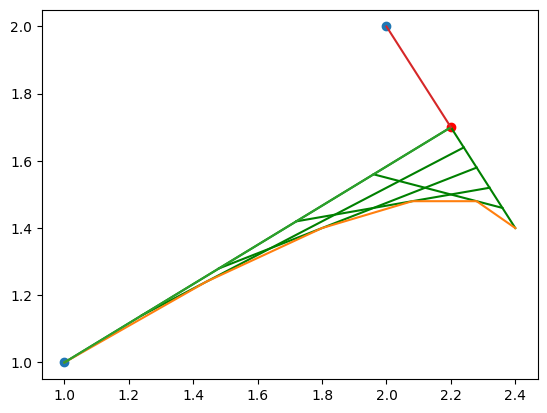

In [6]:
fig, ax = plt.subplots()


dots_x, dots_y = get_dots_lists(enter_dots)

# Start dots
ax.plot(dots_x, dots_y, 'o')

# Moveable dot
#ax.plot(move_dot.x, move_dot.y, 'o', color = "orange")


# Test dots
#test_dot_1 = get_linear_coo_by_percent(enter_dots[0], move_dot, 0.8)
#ax.plot(test_dot_1.x, test_dot_1.y, 'o', color = "purple")

fl1 = final_line(enter_dots[0], move_dot)
fl2 = final_line(move_dot, enter_dots[1])

pers = 0.5

fl_dot1 = fl1.get_coo_by_per(pers)
fl_dot2 = fl2.get_coo_by_per(pers)

flm = final_line(fl_dot1, fl_dot2)
fl_dotm = flm.get_coo_by_per(pers)

#ax.plot(fl_dot1.x, fl_dot1.y, 'o', color = "green")
#ax.plot(fl_dot2.x, fl_dot2.y, 'o', color = "green")
#ax.plot(fl_dotm.x, fl_dotm.y, 'o', color = "green")

#ax.plot([fl1.d1.x, fl1.d2.x], [fl1.d1.y, fl1.d2.y])
#ax.plot([fl2.d1.x, fl2.d2.x], [fl2.d1.y, fl2.d2.y])
#ax.plot([flm.d1.x, flm.d2.x], [flm.d1.y, flm.d2.y])

#bez = bez_1(enter_dots[0], enter_dots[1], move_dot)
#bez_x, bez_y = bez.get_bez_xy_step(0.10)
#ax.plot(bez_x, bez_y)



move_dot2 = dot(move_dot.x + 0.5, move_dot.y + 0.5)
bez = bez_1(enter_dots[0], enter_dots[1], move_dot2)
ax.plot(move_dot2.x, move_dot2.y, 'o', color = "red")
bez_x, bez_y = bez.get_bez_xy_step(0.2,ax)
ax.plot(bez_x, bez_y)


ax.plot([bez.fline_1.d1.x, bez.fline_1.d2.x], [bez.fline_1.d1.y, bez.fline_1.d2.y])
ax.plot([bez.fline_2.d1.x, bez.fline_2.d2.x], [bez.fline_2.d1.y, bez.fline_2.d2.y])


str(fl1.d1), str(fl1.d2)
fl1.len()

In [7]:
print(np.sqrt(0.019999999999999993**2 + 0.06999999999999999**2))

0.07280109889280517


!!!!!!!!!!!


In [8]:
xy = [
    (0, 0), (8e-06, 0.001184), (6.4e-05, 0.004672), (0.000216, 0.010368), (0.000512, 0.018176), (0.001, 0.028), (0.001728, 0.039744), (0.002744, 0.053312), (0.004096, 0.068608), (0.005832, 0.085536), (0.008, 0.104), (0.010648, 0.123904), (0.013824, 0.145152), (0.017576, 0.167648), (0.021952, 0.191296), (0.027, 0.216), (0.032768, 0.241664), (0.039304, 0.268192), (0.046656, 0.295488), (0.054872, 0.323456), (0.064, 0.352), (0.074088, 0.381024), (0.085184, 0.410432), (0.097336, 0.440128), (0.110592, 0.470016), (0.125, 0.5), (0.140608, 0.529984), (0.157464, 0.559872), (0.175616, 0.589568), (0.195112, 0.618976), (0.216, 0.648), (0.238328, 0.676544), (0.262144, 0.704512), (0.287496, 0.731808), (0.314432, 0.758336), (0.343, 0.784), (0.373248, 0.808704), (0.405224, 0.832352), (0.438976, 0.854848), (0.474552, 0.876096), (0.512, 0.896), (0.551368, 0.914464), (0.592704, 0.931392), (0.636056, 0.946688), (0.681472, 0.960256), (0.729, 0.972), (0.778688, 0.981824), (0.830584, 0.989632), (0.884736, 0.995328), (0.941192, 0.998816), (1, 1)
]

x = []
y = []
for i in xy: 
    x.append(i[0])
    y.append(i[1])    

In [9]:
n = 3
vert = [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)]


def get_single_point(t:float):
    x = 0;
    y = 0;
    z = 0;
    
    for i in range(1, n+1):
        x += np.math.factorial(n) / np.math.factorial(i) / np.math.factorial(n-i) * (1 - t)**(n-i) * t**i * vert[i-1][0]
        y += np.math.factorial(n) / np.math.factorial(i) / np.math.factorial(n-i) * (1 - t)**(n-i) * t**i * vert[i-1][1]
    
    return (x,y)

In [10]:
v = []
for i in range(0, 50):
    v.append(get_single_point(1/50*i))

In [11]:
x = []
y = []
for i in v: 
    x.append(i[0])
    y.append(i[1]) 

In [12]:
xy1 = [
    #(0, 0), (0.0004, 0.0396), (0.0016, 0.0784), (0.0036, 0.1164), (0.0064, 0.1536), (0.01, 0.19), (0.0144, 0.2256), (0.0196, 0.2604), (0.0256, 0.2944), (0.0324, 0.3276), (0.04, 0.36), (0.0484, 0.3916), (0.0576, 0.4224), (0.0676, 0.4524), (0.0784, 0.4816), (0.09, 0.51), (0.1024, 0.5376), (0.1156, 0.5644), (0.1296, 0.5904), (0.1444, 0.6156), (0.16, 0.64), (0.1764, 0.6636), (0.1936, 0.6864), (0.2116, 0.7084), (0.2304, 0.7296), (0.25, 0.75), (0.2704, 0.7696), (0.2916, 0.7884), (0.3136, 0.8064), (0.3364, 0.8236), (0.36, 0.84), (0.3844, 0.8556), (0.4096, 0.8704), (0.4356, 0.8844), (0.4624, 0.8976), (0.49, 0.91), (0.5184, 0.9216), (0.5476, 0.9324), (0.5776, 0.9424), (0.6084, 0.9516), (0.64, 0.96), (0.6724, 0.9676), (0.7056, 0.9744), (0.7396, 0.9804), (0.7744, 0.9856), (0.81, 0.99), (0.8464, 0.9936), (0.8836, 0.9964), (0.9216, 0.9984), (0.9604, 0.9996), (1, 1)
   #(70, 250), (66.9444, 240.767), (64.4444, 231.733), (62.5, 222.9), (61.1111, 214.267), (60.2778, 205.833), (60, 197.6), (60.2778, 189.567), (61.1111, 181.733), (62.5, 174.1), (64.4444, 166.667), (66.9444, 159.433), (70, 152.4), (73.6111, 145.567), (77.7778, 138.933), (82.5, 132.5), (87.7778, 126.267), (93.6111, 120.233), (100, 114.4), (106.944, 108.767), (114.444, 103.333), (122.5, 98.1), (131.111, 93.0667), (140.278, 88.2333), (150, 83.6), (160.278, 79.1667), (171.111, 74.9333), (182.5, 70.9), (194.444, 67.0667), (206.944, 63.4333), (220, 60),
   #(10, 250), (12.5618, 231.929), (17.4301, 215.031), (24.385, 199.277), (33.2138, 184.639), (43.7114, 171.088), (55.68, 158.592), (68.9292, 147.12), (83.2761, 136.639), (98.545, 127.117), (114.568, 118.519), (131.184, 110.809), (148.24, 103.952), (165.59, 97.9111), (183.095, 92.6483), (200.625, 88.125), (218.055, 84.3016), (235.27, 81.1377), (252.16, 78.592), (268.624, 76.6222), (284.568, 75.1852), (299.905, 74.237), (314.556, 73.7327), (328.449, 73.6266), (341.52, 73.872), (353.711, 74.4213), (364.974, 75.2261), (375.265, 76.237), (384.55, 77.4039), (392.802, 78.6755), (400, 80)
   (10, 250), (11.6237, 236.299), (14.4563, 223.191), (18.44, 210.67), (23.517, 198.729), (29.6296, 187.361), (36.72, 176.56), (44.7304, 166.319), (53.603, 156.631), (63.28, 147.49), (73.7037, 138.889), (84.8163, 130.821), (96.56, 123.28), (108.877, 116.259), (121.71, 109.751), (135, 103.75), (148.69, 98.2489), (162.723, 93.2411), (177.04, 88.72), (191.584, 84.6789), (206.296, 81.1111), (221.12, 78.01), (235.997, 75.3689), (250.87, 73.1811), (265.68, 71.44), (280.37, 70.1389), (294.883, 69.2711), (309.16, 68.83), (323.144, 68.8089), (336.776, 69.2011), (350, 70)
]

xy2 = [
    #(0, 2), (0.04, 1.96), (0.08, 1.92), (0.12, 1.88), (0.16, 1.84), (0.2, 1.8), (0.24, 1.76), (0.28, 1.72), (0.32, 1.68), (0.36, 1.64), (0.4, 1.6), (0.44, 1.56), (0.48, 1.52), (0.52, 1.48), (0.56, 1.44), (0.6, 1.4), (0.64, 1.36), (0.68, 1.32), (0.72, 1.28), (0.76, 1.24), (0.8, 1.2), (0.84, 1.16), (0.88, 1.12), (0.92, 1.08), (0.96, 1.04), (1, 1), (1.04, 0.96), (1.08, 0.92), (1.12, 0.88), (1.16, 0.84), (1.2, 0.8), (1.24, 0.76), (1.28, 0.72), (1.32, 0.68), (1.36, 0.64), (1.4, 0.6), (1.44, 0.56), (1.48, 0.52), (1.52, 0.48), (1.56, 0.44), (1.6, 0.4), (1.64, 0.36), (1.68, 0.32), (1.72, 0.28), (1.76, 0.24), (1.8, 0.2), (1.84, 0.16), (1.88, 0.12), (1.92, 0.08), (1.96, 0.0400001), (2, 0)
    #(0, 2), (0.04, 1.96), (0.08, 1.92), (0.12, 1.88), (0.16, 1.84), (0.2, 1.8), (0.24, 1.76), (0.28, 1.72), (0.32, 1.68), (0.36, 1.64), (0.4, 1.6), (0.44, 1.56), (0.48, 1.52), (0.52, 1.48), (0.56, 1.44), (0.6, 1.4), (0.64, 1.36), (0.68, 1.32), (0.72, 1.28), (0.76, 1.24), (0.8, 1.2), (0.84, 1.16), (0.88, 1.12), (0.92, 1.08), (0.96, 1.04), (1, 1), (1.04, 0.96), (1.08, 0.92), (1.12, 0.88), (1.16, 0.84), (1.2, 0.8), (1.24, 0.76), (1.28, 0.72), (1.32, 0.68), (1.36, 0.64), (1.4, 0.6), (1.44, 0.56), (1.48, 0.52), (1.52, 0.48), (1.56, 0.44), (1.6, 0.4), (1.64, 0.36), (1.68, 0.32), (1.72, 0.28), (1.76, 0.24), (1.8, 0.2), (1.84, 0.16), (1.88, 0.12), (1.92, 0.08), (1.96, 0.0400001), (2, 0)
    #(0, 0), (0.00111111, 0.0655556), (0.00444445, 0.128889), (0.01, 0.19), (0.0177778, 0.248889), (0.0277778, 0.305556), (0.04, 0.36), (0.0544445, 0.412222), (0.0711111, 0.462222), (0.09, 0.51), (0.111111, 0.555556), (0.134444, 0.598889), (0.16, 0.64), (0.187778, 0.678889), (0.217778, 0.715556), (0.25, 0.75), (0.284444, 0.782222), (0.321111, 0.812222), (0.36, 0.84), (0.401111, 0.865556), (0.444444, 0.888889), (0.49, 0.91), (0.537778, 0.928889), (0.587778, 0.945556), (0.64, 0.96), (0.694444, 0.972222), (0.751111, 0.982222), (0.81, 0.99), (0.871111, 0.995556), (0.934445, 0.998889), (1, 1)
    (0, 0), (0.00111111, 0.0655556), (0.00444445, 0.128889), (0.01, 0.19), (0.0177778, 0.248889), (0.0277778, 0.305556), (0.04, 0.36), (0.0544445, 0.412222), (0.0711111, 0.462222), (0.09, 0.51), (0.111111, 0.555555), (0.134444, 0.598889), (0.16, 0.64), (0.187778, 0.678889), (0.217778, 0.715556), (0.25, 0.75), (0.284444, 0.782222), (0.321111, 0.812222), (0.36, 0.84), (0.401111, 0.865556), (0.444444, 0.888889), (0.49, 0.91), (0.537778, 0.928889), (0.587778, 0.945556), (0.64, 0.96), (0.694445, 0.972222), (0.751111, 0.982222), (0.81, 0.99), (0.871111, 0.995556), (0.934445, 0.998889), (1, 1)
]

xy_c = [
    (70, 250), (66.9133, 240.742), (64.32, 231.636), (62.22, 222.68), (60.6133, 213.876), (59.5, 205.222), (58.88, 196.72), (58.7533, 188.369), (59.12, 180.169), (59.98, 172.12), (61.3333, 164.222), (63.18, 156.476), (65.52, 148.88), (68.3533, 141.436), (71.68, 134.142), (75.5, 127), (79.8133, 120.009), (84.62, 113.169), (89.92, 106.48), (95.7133, 99.9422), (102, 93.5555), (108.78, 87.32), (116.053, 81.2355), (123.82, 75.3022), (132.08, 69.52), (140.833, 63.8889), (150.08, 58.4089), (159.82, 53.08), (170.053, 47.9022), (180.78, 42.8756), (192, 38)
    
]

xy_com = [
    (60, 197.6),# (519.383, 32.2222)
]

normals = [
    #(-1, 0), (-0.999792, 0.0204039), (-0.999133, 0.0416305), (-0.997969, 0.0637002), (-0.996241, 0.0866296), (-0.993884, 0.110432), (-0.99083, 0.135113), (-0.987007, 0.160676), (-0.982338, 0.187112), (-0.976744, 0.214407), (-0.970142, 0.242536), (-0.96245, 0.27146), (-0.953583, 0.301131), (-0.94346, 0.331486), (-0.932005, 0.362446), (-0.919145, 0.393919), (-0.904819, 0.425797), (-0.888975, 0.457957), (-0.871576, 0.490261), (-0.852601, 0.522562), (-0.83205, 0.5547), (-0.809942, 0.58651), (-0.786318, 0.617822), (-0.761243, 0.648466), (-0.734803, 0.67828), (-0.707107, 0.707107), (-0.67828, 0.734803), (-0.648467, 0.761243), (-0.617822, 0.786318), (-0.58651, 0.809942), (-0.5547, 0.83205), (-0.522562, 0.852601), (-0.490261, 0.871575), (-0.457957, 0.888975), (-0.425797, 0.904819), (-0.393919, 0.919145), (-0.362446, 0.932005), (-0.331486, 0.94346), (-0.301131, 0.953583), (-0.27146, 0.96245), (-0.242536, 0.970142), (-0.214407, 0.976744), (-0.187112, 0.982339), (-0.160676, 0.987007), (-0.135113, 0.99083), (-0.110432, 0.993884), (-0.0866297, 0.996241), (-0.0637002, 0.997969), (-0.0416306, 0.999133), (-0.020404, 0.999792), (-0, 1)
    (-1, 0), (-0.999792, 0.0204039), (-0.999133, 0.0416305), (-0.997969, 0.0637002), (-0.996241, 0.0866296), (-0.993884, 0.110432), (-0.99083, 0.135113), (-0.987007, 0.160676), (-0.982339, 0.187112), (-0.976744, 0.214407), (-0.970143, 0.242536), (-0.96245, 0.27146), (-0.953583, 0.301131), (-0.94346, 0.331486), (-0.932005, 0.362446), (-0.919145, 0.393919), (-0.904819, 0.425797), (-0.888975, 0.457957), (-0.871576, 0.490261), (-0.852601, 0.522562), (-0.83205, 0.5547), (-0.809942, 0.58651), (-0.786318, 0.617822), (-0.761243, 0.648466), (-0.734803, 0.67828), (-0.707107, 0.707107), (-0.67828, 0.734803), (-0.648467, 0.761243), (-0.617822, 0.786318), (-0.58651, 0.809942), (-0.5547, 0.83205), (-0.522562, 0.852601), (-0.490261, 0.871576), (-0.457957, 0.888975), (-0.425797, 0.904819), (-0.393919, 0.919145), (-0.362446, 0.932005), (-0.331486, 0.94346), (-0.301131, 0.953583), (-0.27146, 0.96245), (-0.242536, 0.970142), (-0.214407, 0.976744), (-0.187112, 0.982339), (-0.160676, 0.987007), (-0.135113, 0.99083), (-0.110432, 0.993884), (-0.0866297, 0.996241), (-0.0637002, 0.997969), (-0.0416306, 0.999133), (-0.020404, 0.999792), (0, 1)
]

x1 = []
y1 = []

x2 = []
y2 = []

tc = []
xc = []
yc = []

xcom = []
ycom = []

for i in xy1: 
    x1.append(i[0])
    y1.append(i[1])    
    
for i in xy2: 
    x2.append(i[0])
    y2.append(i[1])    
    
len_tc = len(xy_c) -1
for index,i in enumerate(xy_c): 
    tc.append(index/len_tc)
    xc.append(-i[0])
    yc.append(-i[1])    

for i in xy_com:
    xcom.append(i[0])
    ycom.append(i[1])

#tc.append(1.0)

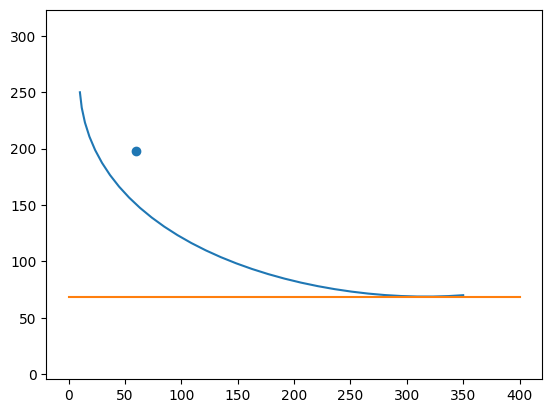

In [15]:
fig, ax = plt.subplots()



lx = [
    0.0,
    0.0,
    1.0, 
    3.0,
]
ly = [
   0.0,
    1.0, 
    1.0,
    0.0,
]

def tangent(x):
    m = 0/0.25
(0.0064, 0.1536)
(0.16, 1.84)

index = 15

d = np.sqrt(xy2[index][0]**2 + xy[index][1]**2)

tangex = [
    xy1[index][0], xy1[index][0] + xy2[index][0]/d
]
tangey = [
    xy1[index][1], xy1[index][1] + xy2[index][1]/d
]

tangent_px = [
    xy1[index][0]
]
tangent_py = [
    xy1[index][1]
]

normalsx = [
    xy1[index][0], xy1[index][0] + normals[index][0]
]
normalsy = [
    xy1[index][1], xy1[index][1] + normals[index][1]
]

# Start dots
ax.plot(x1,y1)
#ax.plot(x2,y2)
ax.scatter(xcom, ycom)
# ax.set_aspect('equal', 'box')
ax.axis('equal')
ax.plot([0,400],[68.7,68.7])
# #ax.plot(x2,y2)
#ax.plot(tangent_px, tangent_py, 'o')
#ax.plot(tangex, tangey)
#ax.plot(normalsx, normalsy, label="normals")

#ax.scatter(x1,y1)

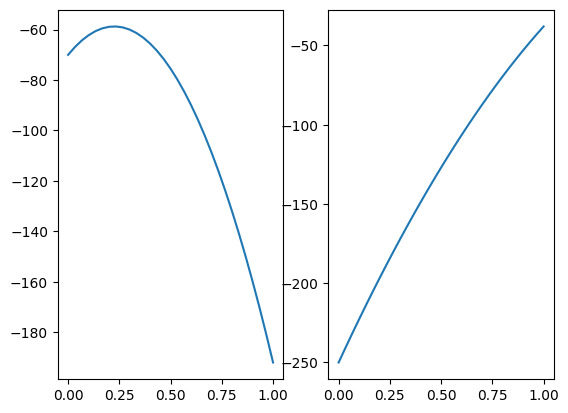

In [14]:
fig, ax = plt.subplots(1,2)

ax[0].plot(tc, xc)
ax[1].plot(tc, yc)

In [85]:
points = [(0,0), (4,4)]
points_r = []
alpha = 20;

for point in points:
    if ((point[0] == 0)and(point[1] == 0)):
        
        points_r.append((point[0], point[1]))
        continue
    
    r = np.sqrt(point[0]**2 + point[1]**2)
    
    sin_angle = point[0] / r
    print(r)
    
    new_x = point[0] - r * np.sqrt(1 - sin_angle**2)#np.cos(np.deg2rad(alpha))
    new_y = point[1] - r * sin_angle#np.sin(np.deg2rad(alpha))

    points_r.append((new_x, new_y)) 


def get_x(po):
    x = []
    for i in po:
        x.append(i[0])
    return x
        
def get_y(po):
    y = []
    for i in po:
        y.append(i[1])
    return y    
    

5.656854249492381


In [86]:
points_r

[(0, 0), (4.000000000000001, 4.0)]

(-0.20000000000000007, 4.200000000000001, -0.2, 4.2)

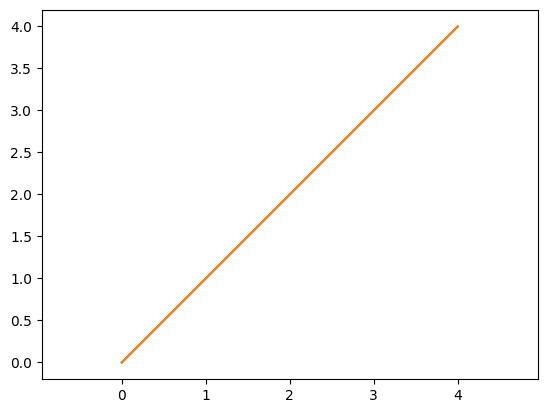

In [87]:
fig, ax = plt.subplots()

ax.plot(get_x(points), get_y(points))
ax.plot(get_x(points_r), get_y(points_r))
ax.axis('equal')